In [1]:
import sys
sys.path.append("..")

In [70]:
import numpy as np
import pandas as pd
import scipy.interpolate
import matplotlib.pyplot as plt
from pyFDA import bspline, gaussNewton, function
from pyFDA.register import localRegression
from pyFDA.data import growth

In [71]:
%matplotlib inline

In [72]:
reload(growth)
reload(function)
reload(bspline)

<module 'pyFDA.bspline' from '../pyFDA/bspline.pyc'>

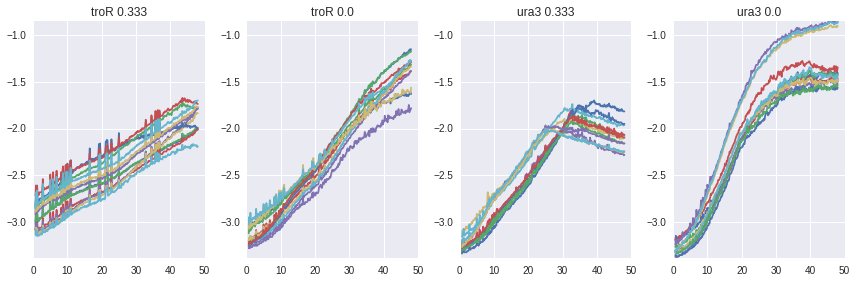

In [91]:
data = growth.GrowthData(pd.read_csv("../data/hsal/hsal.data.csv",index_col=0),pd.read_excel("../data/hsal/hsal.key.xls"))
n = data.data.shape[0]

plt.figure(figsize=(12,4))
data.plot(groupby=["Strain",'mM PQ'],newFig=False,ncols=4)

In [33]:
data.key

,Bio,Condition,Media,Plate Age,Strain,Tech,Well,batch,mM PQ,plate,species,well
0,A,NaN,CM,21,ura3,1,102,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,0
1,A,NaN,CM,21,ura3,2,103,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,1
2,A,NaN,CM,21,ura3,3,104,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,2
3,B,NaN,CM,21,ura3,1,105,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,3
4,B,NaN,CM,21,ura3,2,106,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,4
5,B,NaN,CM,21,ura3,3,107,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,5
6,C,NaN,CM,21,ura3,1,108,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,6
7,C,NaN,CM,21,ura3,2,109,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,7
8,C,NaN,CM,21,ura3,3,111,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,8
9,D,NaN,CM,21,ura3,1,112,20150630 PQ 5,0.000,20150630 PQ 5,Halobacterium salinarum,9


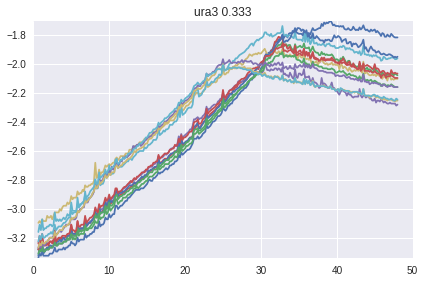

In [208]:
ura3stress = data.select(Strain="ura3",**{'mM PQ':.333})
ura3stress.data.iloc[:,1:] = data.data.loc[:,ura3stress.data.columns.astype('str')[1:]].values

ura3stress.plot(groupby=["Strain",'mM PQ'],newFig=False,ncols=4)

In [ ]:
ura3normal = data.select(Strain="ura3",**{'mM PQ':.333})
ura3stress.data.iloc[:,1:] = data.data.loc[:,ura3stress.data.columns.astype('str')[1:]].values

ura3stress.plot(groupby=["Strain",'mM PQ'],newFig=False,ncols=4)

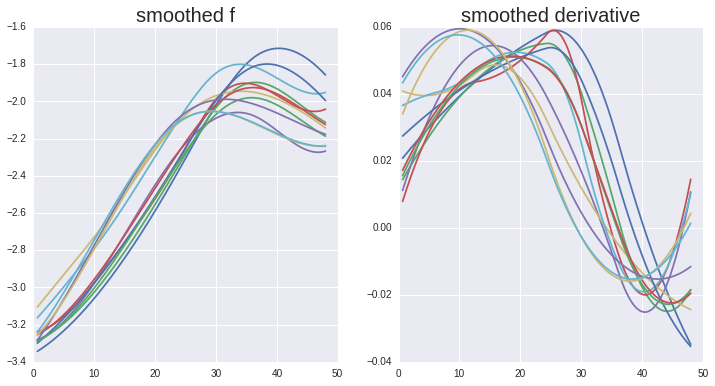

In [93]:
plt.figure(figsize=(12,6))

splines = []
t = ura3stress.data.time.values
for i in range(1,ura3stress.data.shape[1]):
    y = ura3stress.data.iloc[:,i]
    
    s = bspline.Bspline(t,y,s=.2,task=0)
#     k,c,d = scipy.interpolate.splrep(t,y,task=0,s=.2)
#     s.knots,s.coeff,s.degree = k,c,d
    
    splines.append(s)
    
    plt.subplot(121)
    plt.plot(t,splines[-1](t))
    plt.subplot(122)
    plt.plot(t,splines[-1](t,deriv=1))
    
plt.subplot(121)
plt.title("smoothed f",fontsize=20)

plt.subplot(122)
plt.title("smoothed derivative",fontsize=20)

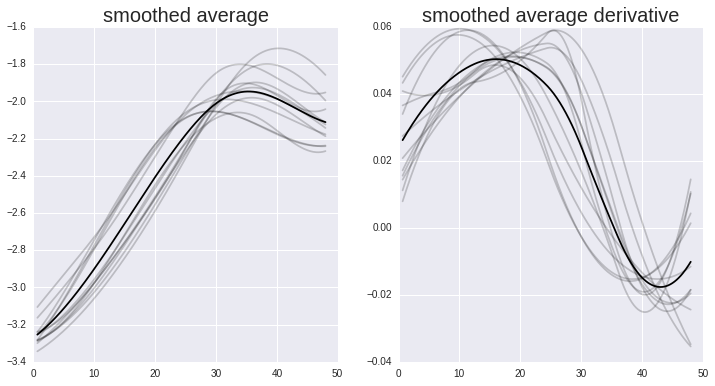

In [94]:
avg = bspline.Bspline(t,np.mean([s(t) for s in splines],0))

plt.figure(figsize=(12,6))

for i in range(0,len(splines)):
    plt.subplot(121)
    plt.plot(t,splines[i](t),'k',alpha=.2)
    plt.subplot(122)
    plt.plot(t,splines[i](t,deriv=1),'k',alpha=.2)
    

plt.subplot(121)
plt.plot(t,avg(t),'k')
plt.subplot(122)
plt.plot(t,avg(t,deriv=1),'k')
    
plt.subplot(121)
plt.title("smoothed average",fontsize=20)

plt.subplot(122)
plt.title("smoothed average derivative",fontsize=20)

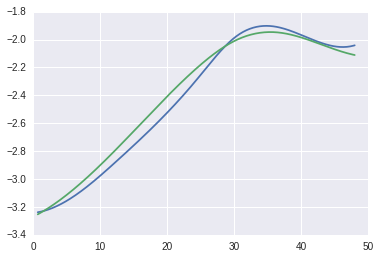

In [106]:
plt.plot(t,splines[2](t))
plt.plot(t,avg(t))

In [110]:
delta = np.mean(t[1:] - t[:-1])
lr = localRegression.RegisterLocalRegression(splines[2](t),avg(t),t,bandwidth=delta*30,ridge=n/32,decay=True)
lr.run(10)

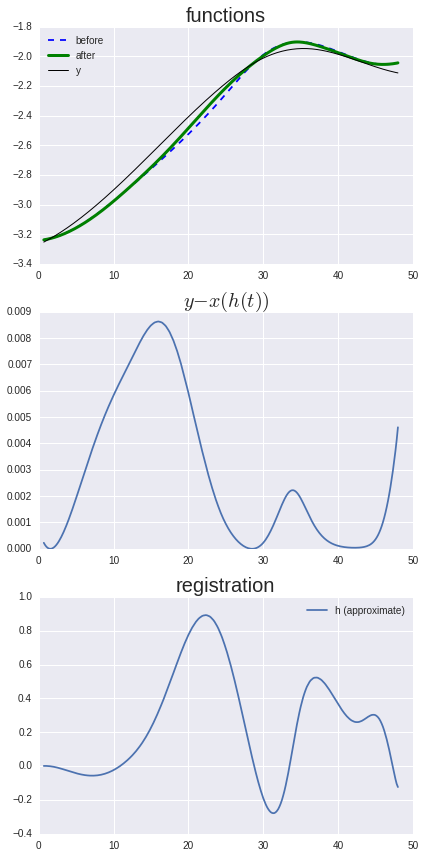

In [111]:
plt.figure(figsize=(6,12))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr.xhats[0](t),'b--',label='before');
plt.plot(t,lr.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,avg(t),'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr.xspline(t)-avg(t))**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr.h()(t)-t,label="h (approximate)")
# plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

In [122]:
splines_iter1 = []
for i in range(len(splines)):
    print i
    lr = localRegression.RegisterLocalRegression(splines[i](t,deriv=1),avg(t,deriv=1),t,bandwidth=delta*30,ridge=n/32,decay=True)
    lr.run(1)
    splines_iter1.append(lr.xspline)

0
1
2
3
4
5
6
7
8
9
10
11


In [123]:
avg2 = bspline.Bspline(t,np.mean([s(t) for s in splines_iter1],0))

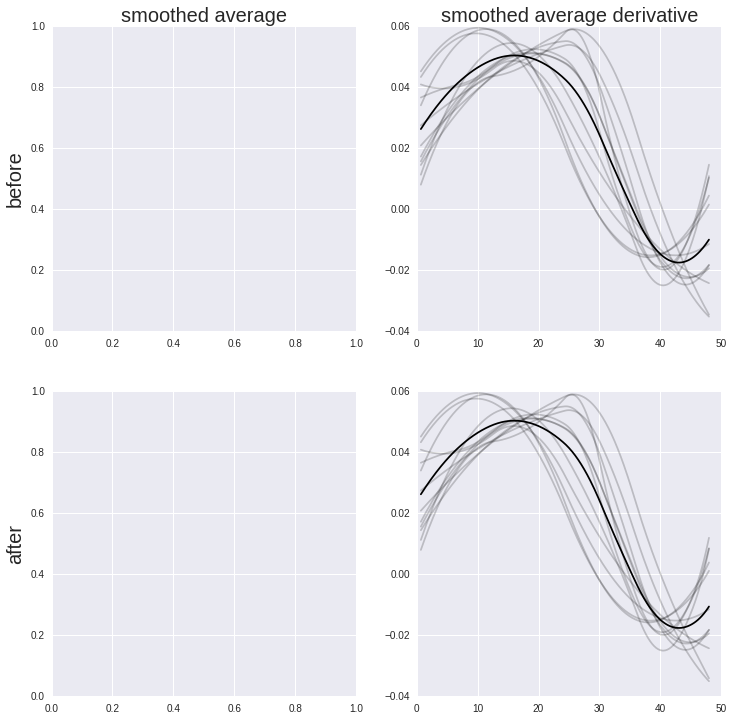

In [133]:
plt.figure(figsize=(12,12))

for i in range(0,len(splines)):
    plt.subplot(221)
#     plt.plot(t,splines[i](t,deriv=-1),'k',alpha=.2)
    plt.subplot(222)
    plt.plot(t,splines[i](t,deriv=1),'k',alpha=.2)
    
    plt.subplot(223)
#     plt.plot(t,splines_iter1[i](t,deriv=-1),'k',alpha=.2)
    plt.subplot(224)
    plt.plot(t,splines_iter1[i](t,deriv=0),'k',alpha=.2)
    

plt.subplot(221)
# plt.plot(t,avg(t,deriv=-1),'k')
plt.subplot(222)
plt.plot(t,avg(t,deriv=1),'k')

plt.subplot(223)
# plt.plot(t,avg2(t,deriv=-1),'k')
plt.subplot(224)
plt.plot(t,avg2(t,deriv=0),'k')
    
plt.subplot(221)
plt.title("smoothed average",fontsize=20)
plt.ylabel("before",fontsize=20)

plt.subplot(222)
plt.title("smoothed average derivative",fontsize=20)

plt.subplot(223)
plt.ylabel("after",fontsize=20)

[[<matplotlib.lines.Line2D at 0x7f613c372550>],

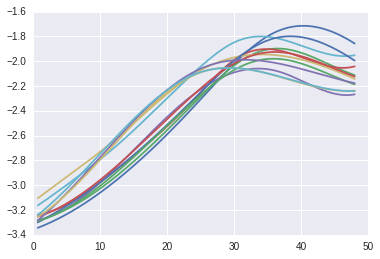

In [132]:
[plt.plot(t,s(t)) for s in splines]

In [219]:
class Register(object):
    
    def __init__(self,x,t,N=None,localRegressionIter=None,localRegressionKwargs=None):
        self.xinit = self.xcurrent = x
        self.xhistory = [x]
        self.avghistory = []
        self.registerHistory = []
        self.k = len(x)
        self.t = t
        self.N = N
        if N is None:
            self.N = 1
        
        self.localRegressionIter = localRegressionIter
        if localRegressionIter is None:
            self.localRegressionIter = 1
            
        self.localRegressionKwargs = localRegressionKwargs
        if localRegressionKwargs is None:
            self.localRegressionKwargs = {}
        
        
    def _iterate(self,):
        avg = bspline.Bspline(t,np.mean([s(t) for s in self.xcurrent],0))
        self.avghistory.append(avg)
        xnext = []
        self.registerHistory.append([])
        
        for i in range(self.k):
            lr = localRegression.RegisterLocalRegression(self.xcurrent[i](t),
                                                         avg(t),t,
                                                         **self.localRegressionKwargs)
            lr.run(self.localRegressionIter)
            xnext.append(lr.xspline)
            self.registerHistory[-1].append(lr.h())
            
        xcurrent = xnext
        self.xhistory.append(xnext)
        
    def run(self):
        for i in range(self.N):
            print i
            self._iterate()

In [220]:
splineDeriv = [bspline.Bspline(t,s(t,deriv=1)) for s in splines]

delta = t[-1] - t[0]

tregister = np.linspace(t[0],t[-1],100)

In [254]:
reg = Register(splineDeriv,tregister,5,2,{"bandwidth":delta/2,"decay":False,"ridge":n/1024})

In [255]:
reg.run()

0
1
2
3
4


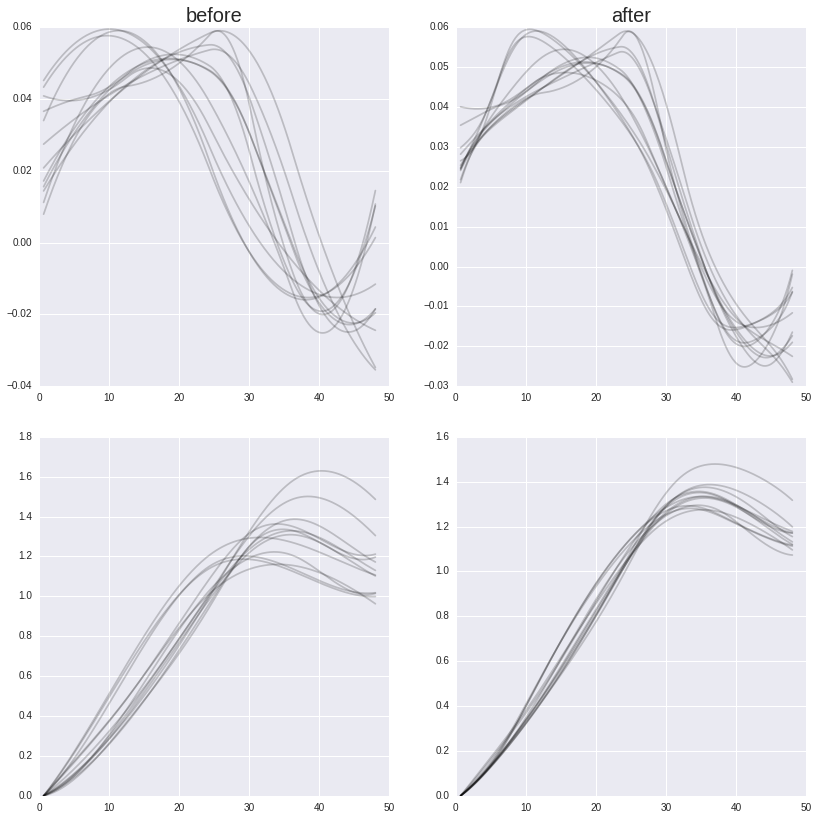

In [256]:
plt.figure(figsize=(12,12))

for i in range(0,len(splines)):
    plt.subplot(221)
    plt.plot(t,reg.xhistory[0][i](t),'k',alpha=.2)
    plt.subplot(223)
    plt.plot(t,reg.xhistory[0][i](t,deriv=-1),'k',alpha=.2)
    
    plt.subplot(222)
    plt.plot(t,reg.xhistory[-1][i](t,deriv=0),'k',alpha=.2)
    plt.subplot(224)
    plt.plot(t,reg.xhistory[-1][i](t,deriv=-1),'k',alpha=.2)
    

# plt.subplot(221)
# plt.plot(t,avg(t,deriv=-1),'k')
# plt.subplot(222)
# plt.plot(t,avg(t,deriv=1),'k')
# plt.subplot(223)
# # plt.plot(t,avg2(t,deriv=-1),'k')
# plt.subplot(224)
# plt.plot(t,avg2(t,deriv=0),'k')
# plt.suptitle("smoothed average",fontsize=20)

plt.subplot(221)

plt.title("before",fontsize=20)

# plt.subplot(222)
# plt.title("smoothed average derivative",fontsize=20)

plt.subplot(222)
plt.title("after",fontsize=20)

plt.tight_layout(pad=3.0)

[[<matplotlib.lines.Line2D at 0x7f613310cd90>],

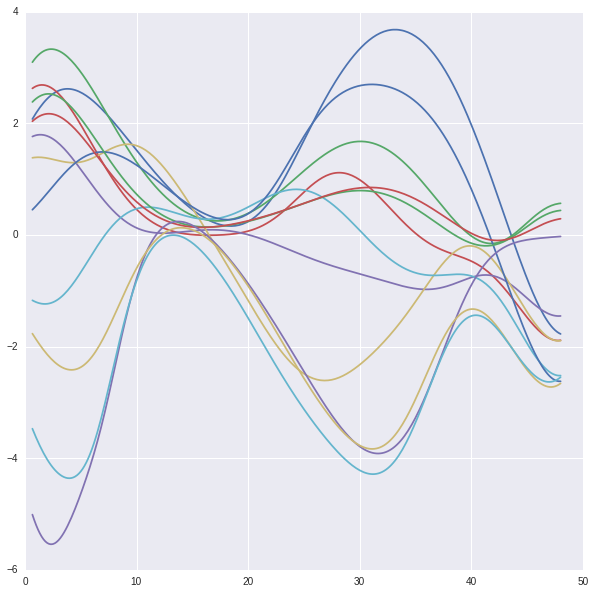

In [257]:
plt.figure(figsize=(10,10))
[plt.plot(t,hf(t)-t) for hf in reg.registerHistory[-1]]

[[<matplotlib.lines.Line2D at 0x7f61334f8c10>],

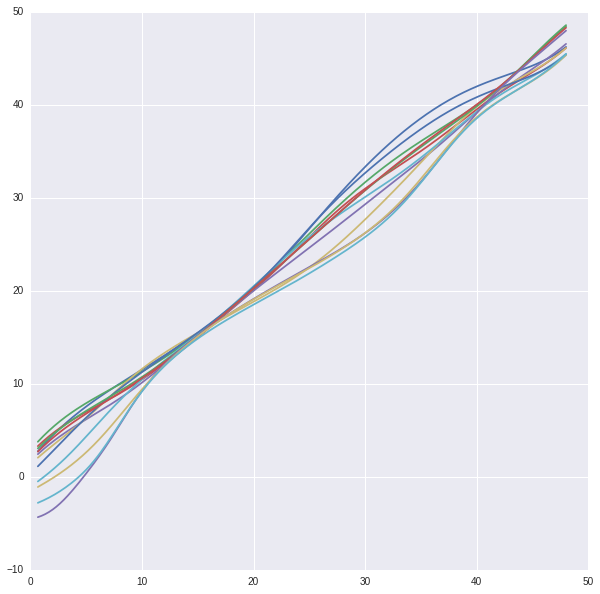

In [258]:
plt.figure(figsize=(10,10))
[plt.plot(t,hf(t)) for hf in reg.registerHistory[-1]]

[[<matplotlib.lines.Line2D at 0x7f61350ea810>],

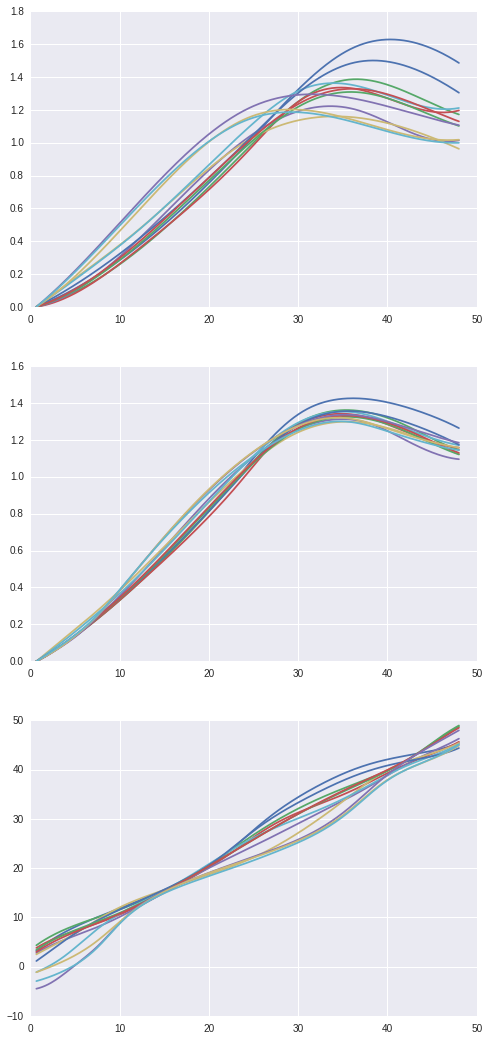

In [232]:
plt.figure(figsize=(8,18))

for i in range(0,len(splines)):
    plt.subplot(311)
    plt.plot(t,reg.xhistory[0][i](t,deriv=-1))
    
    plt.subplot(312)
    plt.plot(t,reg.xhistory[-1][i](t,deriv=-1))
    
plt.subplot(313)
[plt.plot(t,hf(t)) for hf in reg.registerHistory[-1]]

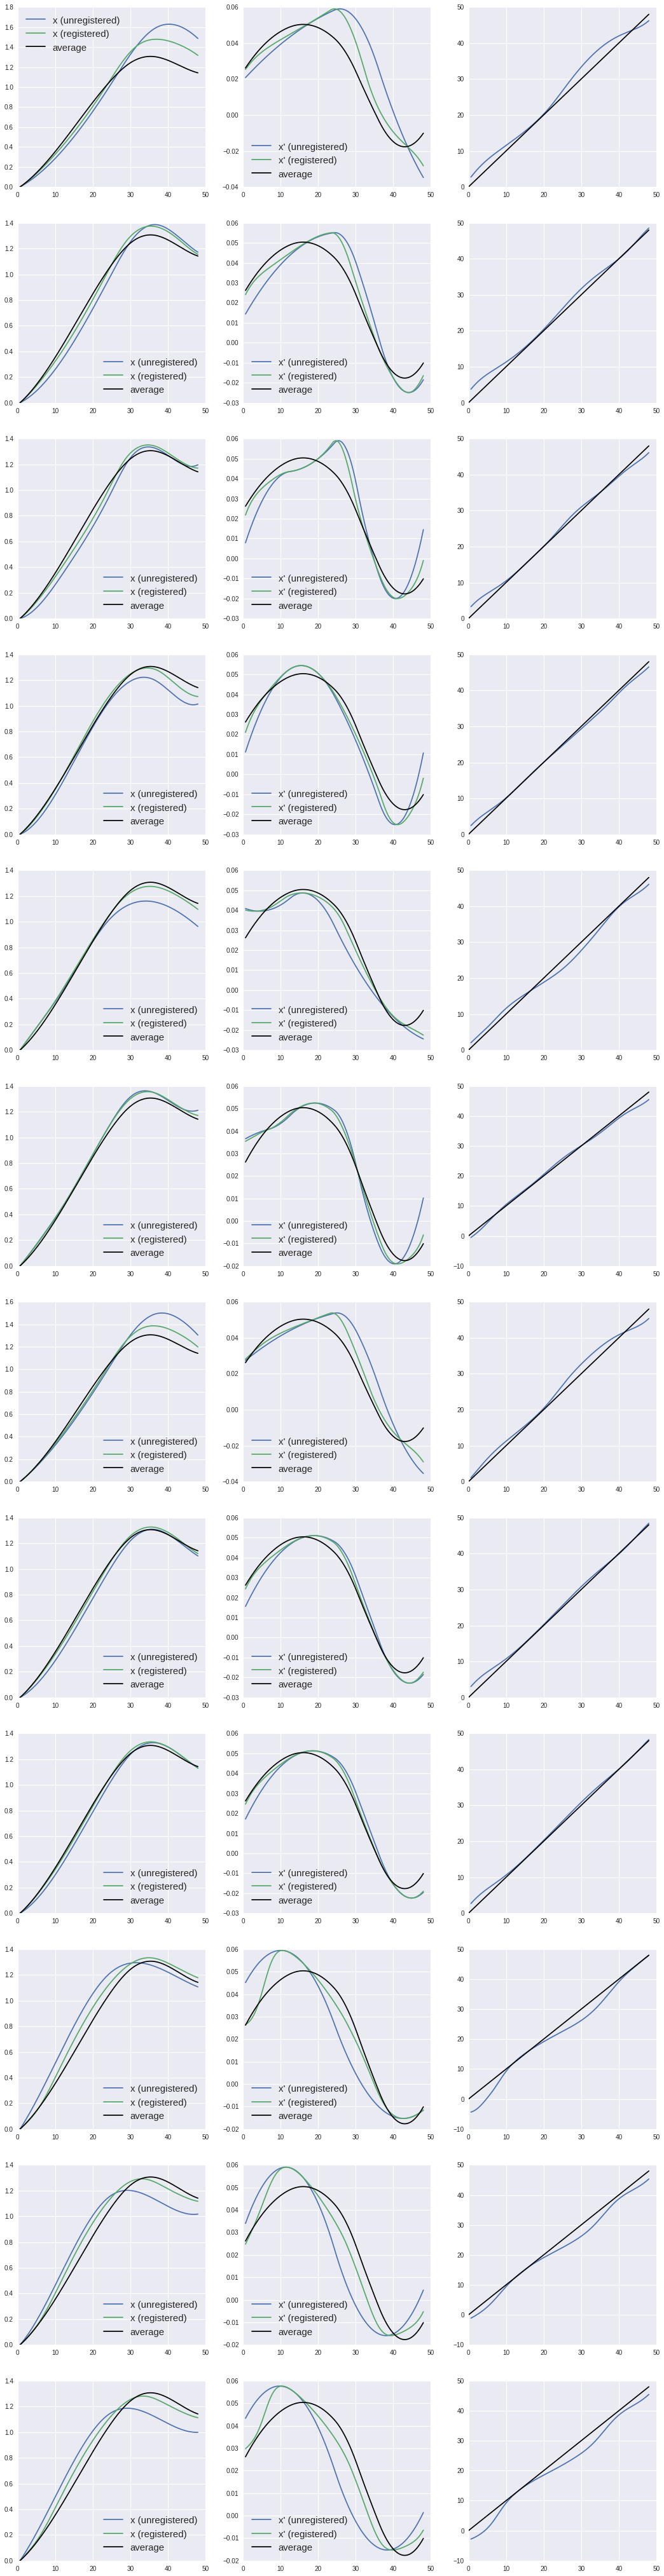

In [259]:
plt.figure(figsize=(3*6,6*len(splines)))

for i in range(0,len(splines)):
    plt.subplot(len(splines),3,3*i+1)
    plt.plot(t,reg.xhistory[0][i](t,deriv=-1),label="x (unregistered)")
    plt.plot(t,reg.xhistory[-1][i](t,deriv=-1),label="x (registered)")
    plt.plot(t,reg.avghistory[-1](t,deriv=-1),'k',label="average")
    plt.legend(loc="best",fontsize=15)
    
    plt.subplot(len(splines),3,3*i+2)
    plt.plot(t,reg.xhistory[0][i](t,deriv=0),label="x' (unregistered)")
    plt.plot(t,reg.xhistory[-1][i](t,deriv=0),label="x' (registered)")
    plt.plot(t,reg.avghistory[-1](t,deriv=0),'k',label="average")
    plt.legend(loc="best",fontsize=15)
    
    plt.subplot(len(splines),3,3*i+3)
    plt.plot(t,reg.registerHistory[-1][i](t))
    plt.plot([0,t[-1]],[0,t[-1]],'k')